# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import other libraries if needed

# 1. EDA

In [2]:
train = pd.read_csv("./train.csv")
train.head()

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,1,41.805313,-122.946953,Female,No,Yes,No,17,Yes,No,...,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.687896,1845.463646,Yes,5159.662242
1,2,37.557421,-121.662183,Female,No,No,No,6,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.809145,137.340359,No,5555.255006
2,3,33.926801,-118.337288,Male,No,Yes,Yes,72,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.672564,2033.267100,No,6426.081258
3,4,33.842400,-117.522049,Male,No,No,No,11,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.551155,236.568970,No,5431.894188
4,5,33.659241,-116.560957,Female,No,No,No,56,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.614627,6505.861021,No,4210.224835


In [3]:
train.columns

Index(['CustomerID', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV'],
      dtype='object')

In [4]:
print("Size of the data:", train.shape)

Size of the data: (5634, 24)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5634 non-null   int64  
 1   Latitude           5634 non-null   float64
 2   Longitude          5634 non-null   float64
 3   Gender             5634 non-null   object 
 4   Senior Citizen     5634 non-null   object 
 5   Partner            5634 non-null   object 
 6   Dependents         5634 non-null   object 
 7   Tenure Months      5634 non-null   int64  
 8   Phone Service      5634 non-null   object 
 9   Multiple Lines     5634 non-null   object 
 10  Internet Service   5634 non-null   object 
 11  Online Security    5634 non-null   object 
 12  Online Backup      5634 non-null   object 
 13  Device Protection  5634 non-null   object 
 14  Tech Support       5634 non-null   object 
 15  Streaming TV       5634 non-null   object 
 16  Streaming Movies   5634 

In [6]:
train.nunique()

CustomerID           5634
Latitude             5634
Longitude            5634
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      5634
Total Charges        5626
Churn Label             2
CLTV                 5634
dtype: int64

In [7]:
# descriptive statistics for numerical columns
train.describe()

,CustomerID,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,2817.500000,36.269710,-119.783700,32.396166,64.725332,2504.289916,4405.419906
std,1626.540039,2.461827,2.149481,24.618646,30.189317,2491.276471,1188.118436
min,1.000000,32.556115,-124.305928,0.000000,18.235191,0.000000,2001.007650
25%,1409.250000,34.030504,-121.786468,9.000000,35.317744,437.904744,3463.916945
50%,2817.500000,36.300459,-119.688426,29.000000,70.249691,1536.578453,4537.259130
75%,4225.750000,38.209293,-118.046674,56.000000,89.938891,4154.543414,5386.183285
max,5634.000000,41.967365,-114.184825,72.000000,118.612904,9353.780727,6500.684263


In [8]:
# descriptive statistics for categorical columns
train.describe(include="object")

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label
count,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,2848,4722,2924,4349,5103,2720,2481,2803,2466,2442,2792,2250,2222,3108,3349,1902,4139


In [9]:
train.isnull().sum()

CustomerID           0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64

In [10]:
train["Churn Label"].value_counts()

No     4139
Yes    1495
Name: Churn Label, dtype: int64

In [11]:
# Check for outliers with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_grid(dataframe, n_cols=3, subplot_size=(5, 3)):
    """
    Plots a grid of boxplots for all numerical non-binary columns in a DataFrame.

    :param dataframe: pandas DataFrame to plot.
    :param n_cols: Number of columns in the grid.
    :param subplot_size: Size of each subplot (width, height).
    """
    # Identify numerical columns that are not binary (more than 2 unique values)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and dataframe[col].nunique() > 2]

    # Determine the grid size (number of rows and columns in the grid)
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Computes the required number of rows

    # Create a figure with subplots in a grid
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
        sns.boxplot(y=dataframe[col])
        plt.title(col)
    plt.tight_layout()  # Adjusts the subplots to fit in the figure area
    plt.show()


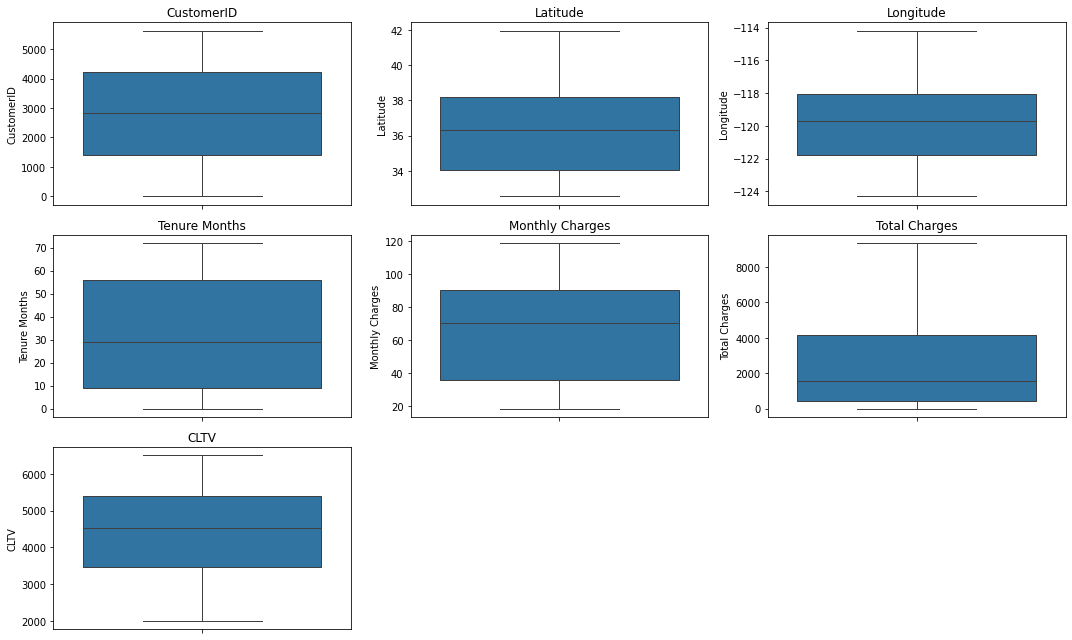

In [12]:
plot_boxplots_grid(train)

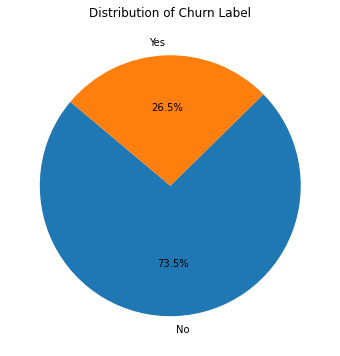

In [13]:
# Plot the distribution for target column
import matplotlib.pyplot as plt

def plot_churn_distribution(data, column='Churn Label'):
    """
    Plots the distribution of the churn label in a pie chart.

    :param data: DataFrame containing the customer data.
    :param column: Name of the column containing the churn label.
    """
    # Calculating the distribution
    churn_dist = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Churn Label')
    plt.show()

# Testing the function with the customer data
plot_churn_distribution(train)

In [14]:
# Plot the distribution for each numerical columns based on the churn label

import seaborn as sns

def plot_numerical_distribution_by_churn(data, churn_column='Churn Label'):
    """
    Plots the distribution of each numerical column in the data, separated by churn label.

    :param data: DataFrame containing the customer data.
    :param churn_column: Name of the column containing the churn label.
    """
    # Identifying numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Number of rows and columns for the subplot
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols

    # Creating subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plotting each numerical column
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, hue=churn_column, ax=axes[i], kde=True, element='step')
        axes[i].set_title(f'Distribution of {col} by Churn Label')
        axes[i].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

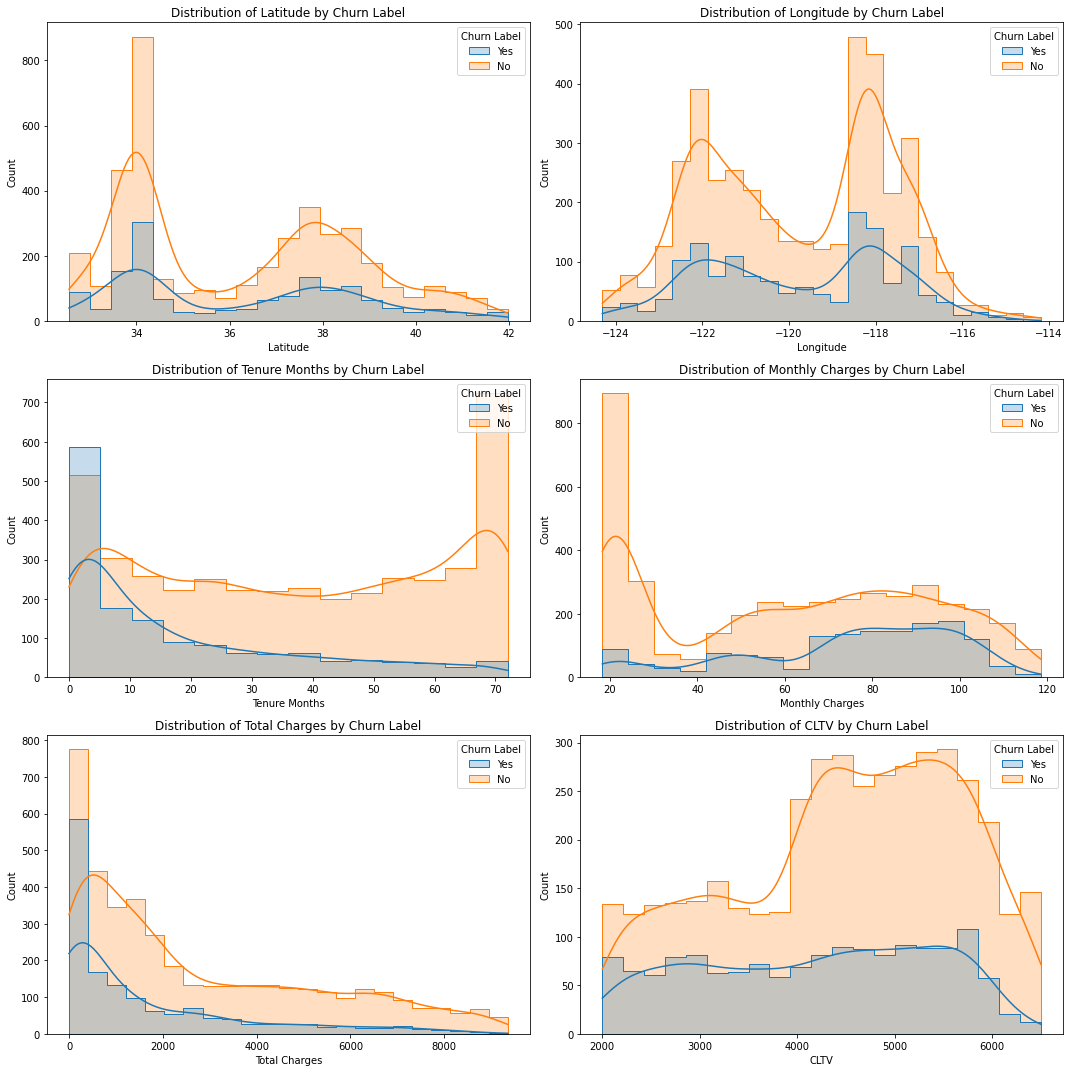

In [15]:
plot_numerical_distribution_by_churn(train[['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Label']])

In [16]:
# Plot geospatial data

import cartopy.crs as ccrs
import cartopy.feature as cf

def plot_latitude_longitude_with_map(df):
    """
    Create a scatter plot of the latitude and longitude of each observation, with a world map as the background.

    :param df: The DataFrame to generate the chart for.
    """

    # Create a new figure with a PlateCarree projection
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Add the coastlines and countries to the map
    ax.coastlines()
    ax.add_feature(cf.BORDERS, linestyle='-', alpha=0.5)

    # Plot the longitude and latitude of each observation on the map
    ax.scatter(df["Longitude"].values, df["Latitude"].values, s=5, alpha=0.25, transform=ccrs.PlateCarree())

    # Set the chart title
    plt.title("Observation Locations")

    # Display the chart
    plt.show()

In [17]:
# plot_latitude_longitude_with_map(train)

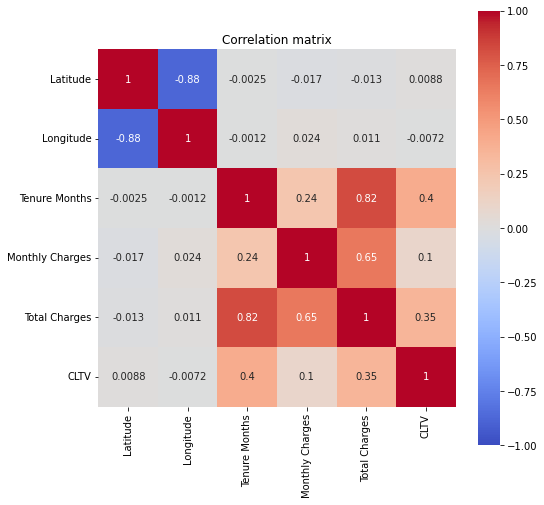

In [18]:
# Plot correlation matrix
# REVISI SESUAI KEBUTUHAN
corr = train.drop('CustomerID', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

# Train set splitting

In [19]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train, test_size=0.2, random_state=42)

In [20]:
train_set.shape, val_set.shape

((4507, 24), (1127, 24))

# DATA CLEANING & PREPROCESSING

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

## DATA CLEANING

### Dropping columns

Columns which is unique for every row will not provide useful information to the model, these columns are: CustomerID, Latitude, Longitude, Monthly Charges, and CLTV.

In [22]:
columns_to_drop = ['CustomerID', 'Latitude', 'Longitude', "CLTV"]
# we keep total charges because it is highly correlated with tenure months

train_set.drop(columns=columns_to_drop, inplace=True)
val_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
4082,Male,No,No,No,8,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.221349,221.947873,No
1728,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.810450,251.806446,No
2795,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),106.699162,7863.728271,No
334,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.085169,1590.745409,No
3625,Male,No,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.409925,5192.545868,No


### Handling missing data

No missing data so we dont need to do anything.

### Feature Engineering

In [23]:
train_set.shape

(4507, 20)

## DATA PREPROCESSING

### FEATURE SCALING

In [24]:
# Import necessary scalers
from sklearn.preprocessing import RobustScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        
        # Fit the scaler here

        self.numerical_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
        self.sc = RobustScaler().fit(X[self.numerical_cols])
        
        return self
    
    def transform(self, X):
        
        # Perform scaling here

        X[self.numerical_cols] = self.sc.transform(X[self.numerical_cols])
        
        return X

### FEATURE ENCODING

In [25]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        # Encode the categorical variables here
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Check if the column is binary
            if X[col].nunique() == 2 and col != 'Gender':
                
                # Map the column with a dictionary
                X_encoded[col] = X_encoded[col].map({'Yes': 1, 'No': 0})
                
            else:
                # Perform one-hot encoding
                X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

                # Drop original categorical columns from DataFrame
                X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

In [26]:
train_set

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
4082,Male,No,No,No,8,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),25.221349,221.947873,No
1728,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.810450,251.806446,No
2795,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),106.699162,7863.728271,No
334,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.085169,1590.745409,No
3625,Male,No,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.409925,5192.545868,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Female,No,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.103404,2363.898584,No
5191,Male,No,Yes,Yes,38,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),94.864986,3965.356432,No
5226,Male,No,Yes,No,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.002349,1320.155030,No
5390,Female,No,No,No,37,Yes,Yes,DSL,Yes,No,No,No,Yes,No,One year,No,Bank transfer (automatic),64.891306,2641.076166,No


## COMPILE PIPELINE

In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", FeatureScaler()),
                 ("encoder", FeatureEncoder())])

In [28]:
# Your code should work up until this point
train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

# MODEL TRAINING

In [29]:
train_set

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Gender_Female,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
4082,0,0,0,-0.434783,0,1,-0.829690,-0.351807,0,0,...,1,0,0,1,0,0,0,1,0,0
1728,0,1,1,-0.369565,1,0,-0.910703,-0.343671,0,1,...,0,1,0,0,0,1,0,1,0,0
2795,0,1,1,0.847826,1,0,0.666789,1.730413,0,1,...,0,0,1,0,0,1,0,1,0,0
334,0,0,0,0.956522,1,0,-0.924024,0.021160,0,1,...,0,1,0,0,0,1,0,1,0,0
3625,0,1,0,0.478261,1,1,0.441076,1.002573,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,0.021739,1,1,0.068113,0.231828,0,1,...,1,0,0,1,0,0,0,0,1,0
5191,0,1,1,0.217391,1,1,0.449434,0.668191,0,0,...,1,0,0,0,0,1,1,0,0,0
5226,0,1,0,0.695652,1,0,-0.925545,-0.052570,0,0,...,0,1,0,0,0,1,0,0,0,1
5390,0,0,0,0.195652,1,0,-0.101083,0.307353,0,1,...,1,0,0,0,1,0,1,0,0,0


In [30]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.neighbors import KNeighborsClassifier

# RF hyperparams
rf_params = {
    "random_state":42,
    "n_estimators":350,
    "class_weight":{0:1, 1:100},
    "bootstrap":True,
    "oob_score":True,
}

# catboost hyperparams
cat_params = {
    "random_state": 42,
    "verbose": False,
    "iterations": 600,
    "learning_rate": 2e-4,
    "depth": 10,
    "subsample": 0.05,
    "colsample_bylevel": 1,
    "class_weights": [5, 6]
}

# Create the model
rf = RandomForestClassifier(**rf_params)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(**cat_params)
knn = KNeighborsClassifier(n_neighbors=15, weights="distance")

In [31]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Split the data into features and target
X_train = train_set.drop('Churn Label', axis=1)
y_train = train_set['Churn Label']

X_val = val_set.drop('Churn Label', axis=1)
y_val = val_set['Churn Label']

# Fit and transform on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the validation set using the same imputer
X_val_imputed = imputer.transform(X_val)

# Train the model
rf.fit(X_train_imputed, y_train)
xgb.fit(X_train_imputed, y_train)
cat.fit(X_train_imputed, y_train)
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

neural network

In [ ]:
# # building a neural network
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# neural = Sequential([
#     Dense(64, activation="relu", input_shape=(X_train_imputed.shape[1],)),
#     Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
#     Dense(1, activation="sigmoid")
    
# ])

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
# neural.compile(optimizer=Adam(learning_rate=0.005), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# neural.fit(X_train_imputed, y_train, validation_data=(X_val_imputed, y_val), epochs=100, batch_size=32, class_weight={0:1, 1:40}, callbacks=[early_stopping])

# MODEL EVALUATION AND TUNING

In [38]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# Make predictions
rf_pred = rf.predict(X_val_imputed)
xgb_pred = xgb.predict(X_val_imputed)
cat_pred = cat.predict(X_val_imputed)
knn_pred = knn.predict(X_val_imputed)
# neural_pred = (neural.predict(X_val_imputed) > 0.5).astype(int)

# Print classification report for each model
print("Random Forest Classifier")
print(classification_report(y_val, rf_pred))
print()
print("XGBoost Classifier")
print(classification_report(y_val, xgb_pred))
print()
print("CatBoost Classifier")
print(classification_report(y_val, cat_pred))
print()
print("KNN Classifier")
print(classification_report(y_val, knn_pred))
# print()
# print("Neural Net Classifier")
# print(classification_report(y_val, neural_pred))

# Define a function to print classification report with metrics in percentage
def print_classification_report(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    
    print(model_name)
    print("Accuracy: {:.2%}".format(report['accuracy']))
    print("F1 Score (weighted): {:.2%}".format(report['weighted avg']['f1-score']))
    print()

# Print classification report for each model
print_classification_report("Random Forest Classifier", y_val, rf_pred)
# print_classification_report("XGBoost Classifier", y_val, xgb_pred)
print_classification_report("CatBoost Classifier", y_val, cat_pred)
print_classification_report("KNeighbors Classifier", y_val, knn_pred)
# print_classification_report("Neural Net Classifier", y_val, neural_pred)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       860
           1       0.63      0.53      0.58       267

    accuracy                           0.82      1127
   macro avg       0.75      0.72      0.73      1127
weighted avg       0.81      0.82      0.81      1127


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       860
           1       0.56      0.55      0.55       267

    accuracy                           0.79      1127
   macro avg       0.71      0.71      0.71      1127
weighted avg       0.79      0.79      0.79      1127


CatBoost Classifier
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       860
           1       0.62      0.59      0.61       267

    accuracy                           0.82      1127
   macro avg       0.75      0.74      0.74      1127
weighted

In [81]:
import optuna

def objective(trial):
    # Define hyperparameters to be optimized
    cat_params = {
        "random_state": 42,
        'iterations': trial.suggest_int('iterations', 75, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 1),
        'depth': trial.suggest_int('depth', 2, 11),
        "subsample": trial.suggest_float("subsample", 0.005, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.001, 1),
        "class_weights": [5, 6]
    }
    
    # Create a CatBoost classifier
    model = CatBoostClassifier(**cat_params, verbose=0)
    # model = RandomForestClassifier(**rf_params, verbose=0)

    # Create a CatBoost Pool for training
    train_pool = Pool(X_train_imputed, label=y_train)

    # Train the model
    model.fit(train_pool)
    # model.fit(X_train_imputed, y_train)

    # Evaluate the model on the validation set
    val_pool = Pool(X_val_imputed, label=y_val)
    val_score = model.score(val_pool)
    # val_score = model.score(X_val_imputed, y_val)

    return val_score  # The objective is to maximize this score

In [82]:
study = optuna.create_study(direction='maximize')  # or 'minimize' depending on the metric
study.optimize(objective, n_trials=150)

# Print the best hyperparameters and the corresponding score
print('Best Trial:')
print('  Value: ', study.best_trial.params)
print('  Score: ', study.best_value)

[I 2024-01-28 17:56:04,417] A new study created in memory with name: no-name-3ae03796-b4fd-4841-8aa7-37008258804f
[I 2024-01-28 17:56:10,386] Trial 0 finished with value: 0.8145519077196096 and parameters: {'iterations': 1029}. Best is trial 0 with value: 0.8145519077196096.
[I 2024-01-28 17:56:16,762] Trial 1 finished with value: 0.8127772848269743 and parameters: {'iterations': 1120}. Best is trial 0 with value: 0.8145519077196096.
[I 2024-01-28 17:56:21,567] Trial 2 finished with value: 0.8145519077196096 and parameters: {'iterations': 837}. Best is trial 0 with value: 0.8145519077196096.
[I 2024-01-28 17:56:28,313] Trial 3 finished with value: 0.8127772848269743 and parameters: {'iterations': 1235}. Best is trial 0 with value: 0.8145519077196096.
[I 2024-01-28 17:56:29,153] Trial 4 finished with value: 0.8145519077196096 and parameters: {'iterations': 122}. Best is trial 0 with value: 0.8145519077196096.
[I 2024-01-28 17:56:33,952] Trial 5 finished with value: 0.8136645962732919 an

Best Trial:
  Value:  {'iterations': 175}
  Score:  0.8181011535048802


In [69]:
hyper_catparams = {"random_state":42,
                   'iterations': 223,
                   'learning_rate': 0.09334129347452973,
                   'depth': 3,
                   'subsample': 0.37602884892942345,
                   'colsample_bylevel': 0.32375119516383455,
                   "class_weights": [5, 6]
}

new_cat = CatBoostClassifier(**hyper_catparams)

In [70]:
new_cat.fit(X_train_imputed, y_train)

0:	learn: 0.6454634	total: 3.15ms	remaining: 700ms
1:	learn: 0.6172724	total: 7.54ms	remaining: 833ms
2:	learn: 0.5961675	total: 10.5ms	remaining: 767ms
3:	learn: 0.5669035	total: 13.5ms	remaining: 738ms
4:	learn: 0.5549541	total: 15.8ms	remaining: 687ms
5:	learn: 0.5355363	total: 18.3ms	remaining: 661ms
6:	learn: 0.5142693	total: 20.8ms	remaining: 643ms
7:	learn: 0.5066432	total: 23.7ms	remaining: 637ms
8:	learn: 0.4971745	total: 26.6ms	remaining: 633ms
9:	learn: 0.4888016	total: 29.2ms	remaining: 623ms
10:	learn: 0.4826674	total: 32.1ms	remaining: 618ms
11:	learn: 0.4773316	total: 34.8ms	remaining: 611ms
12:	learn: 0.4741708	total: 37.5ms	remaining: 605ms
13:	learn: 0.4696926	total: 40.3ms	remaining: 601ms
14:	learn: 0.4663910	total: 43.2ms	remaining: 600ms
15:	learn: 0.4629031	total: 46ms	remaining: 596ms
16:	learn: 0.4594596	total: 48.8ms	remaining: 591ms
17:	learn: 0.4563495	total: 51.4ms	remaining: 585ms
18:	learn: 0.4541380	total: 54.1ms	remaining: 581ms
19:	learn: 0.4523505	tot

In [71]:
newcat_pred = new_cat.predict(X_val_imputed)
print("CatBoost Classifier")
print(classification_report(y_val, newcat_pred))
print()
print_classification_report("CatBoost Classifier", y_val, newcat_pred)

CatBoost Classifier
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       860
           1       0.62      0.65      0.64       267

    accuracy                           0.82      1127
   macro avg       0.76      0.76      0.76      1127
weighted avg       0.83      0.82      0.83      1127


CatBoost Classifier
Accuracy: 82.43%
F1 Score (weighted): 82.54%



# Submission

In [72]:
test = pd.read_csv("test.csv")
test

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,1,38.420433,-122.370891,Male,Yes,Yes,No,23,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.806593,526.406797,3416.114932
1,2,34.618670,-118.272907,Female,No,Yes,Yes,47,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.270838,1099.702344,2859.263391
2,3,38.735305,-121.457408,Female,No,No,No,40,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.998124,4663.917476,3783.326413
3,4,38.004622,-122.289280,Male,No,No,No,1,Yes,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.517182,95.168900,5228.541279
4,5,34.098298,-117.303148,Female,No,Yes,Yes,19,Yes,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.572953,1036.074713,5734.142428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,36.054914,-118.602240,Female,No,Yes,No,54,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,110.500592,6563.735149,6190.448256
1405,1406,34.524096,-116.864046,Male,No,Yes,No,4,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.052243,444.629869,4417.169411
1406,1407,37.462715,-120.230129,Female,No,No,No,14,Yes,No,...,No,No,No,No,Month-to-month,No,Electronic check,50.510294,777.858532,3184.464096
1407,1408,38.805728,-122.580694,Female,No,Yes,Yes,72,Yes,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.639489,9396.247495,5474.061794


In [73]:
test_set = test.drop(columns_to_drop, axis=1)

In [74]:
test_set = pipe.fit_transform(test_set)

In [75]:
test_set

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Gender_Female,Gender_Male,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,1,0,-0.133333,1,1,-0.987277,-0.263992,0,1,...,0,1,0,0,1,0,0,0,1,0
1,0,1,1,0.400000,1,1,-0.978120,-0.111574,1,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0.244444,1,1,0.692942,0.836013,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,-0.622222,1,1,0.308723,-0.378641,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0,1,1,-0.222222,1,1,-0.419922,-0.128490,1,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,1,0,0.555556,1,0,0.781744,1.341102,1,0,...,0,0,1,0,1,0,0,0,1,0
1405,0,1,0,-0.555556,1,0,0.595396,-0.285733,0,1,...,0,0,1,1,0,0,0,0,1,0
1406,0,0,0,-0.333333,1,0,-0.401435,-0.197140,1,0,...,1,0,0,1,0,0,0,0,1,0
1407,0,1,1,0.955556,1,1,0.942266,2.094157,1,0,...,0,0,1,0,0,1,1,0,0,0


In [76]:
test_pred = new_cat.predict(test_set)

In [77]:
final_df = pd.DataFrame(test["CustomerID"])
final_df["Churn Label"] = test_pred
final_df["Churn Label"] = final_df["Churn Label"].map({1: "Yes", 0: "No"})

final_df

,CustomerID,Churn Label
0,1,No
1,2,No
2,3,No
3,4,Yes
4,5,No
...,...,...
1404,1405,No
1405,1406,Yes
1406,1407,No
1407,1408,No


In [78]:
final_df.to_csv("newcat_sub.csv", index=False)